# Gradient Descent - Optimization Algorithm using Boston Dataset

### Loading libraries


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [15]:
# loading Boston Dataset from sklearn
from sklearn.datasets import load_boston
boston = load_boston()

In [16]:
import pandas as pd
bos = pd.DataFrame(boston.data)
print(bos.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [17]:
bos['PRICE'] = boston.target

In [18]:
X = bos.iloc[:,0:13]
y = bos.iloc[:,-1]

In [19]:
from sklearn.model_selection import train_test_split
# Split arrays or matrices into random train and test subsets
# test_size=0.3 means out of 10k 3k will be test set and 7k train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [20]:
from sklearn.preprocessing import StandardScaler
# prepare the scaler with train data
scaler = StandardScaler(with_mean=False).fit(X_train)
# transform both train and test data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Normal Gradient Descent 

In [318]:
# initialize b and w
initial_b = 0
initial_w = np.zeros(13)

In [319]:
def computeCost(b,w,X,y):
    '''This is to compute cost of the function
       our target is to reduce this cost in every iteration'''
    pred = X @ w + b
    cost = 1/(2*len(X)) * np.sum(np.square(pred - y))
    return cost

In [348]:
#gradient descent
def gradientDescent(X,y,w_current,b_current,iters,learningRate):
    
    '''gradient descent algorithm to be used to find minimal value of 
       the function named computeCost.
       
       Here we update w and b after computing cost for every training points.'''
    N = (len(X))
    cost = np.zeros(iters)
    for i in range(iters):
        y_current = X @ w_current + b_current
        cost[i] = computeCost(b_current,w_current,X,y)
        w_gradient = -(1/N) * np.dot(X.T , (y - y_current))
        b_gradient = -(1/N) * np.sum(y - y_current)
        w_current = w_current - (learningRate * w_gradient)
        b_current = b_current - (learningRate * b_gradient)
    return w_current,b_current,learningRate,cost

w_gd,b_gd,learningRate,c_gd = gradientDescent(X_train,y_train,initial_w,initial_b,20000,.001)

Text(0.5,1,'Iterations vs. Cost')

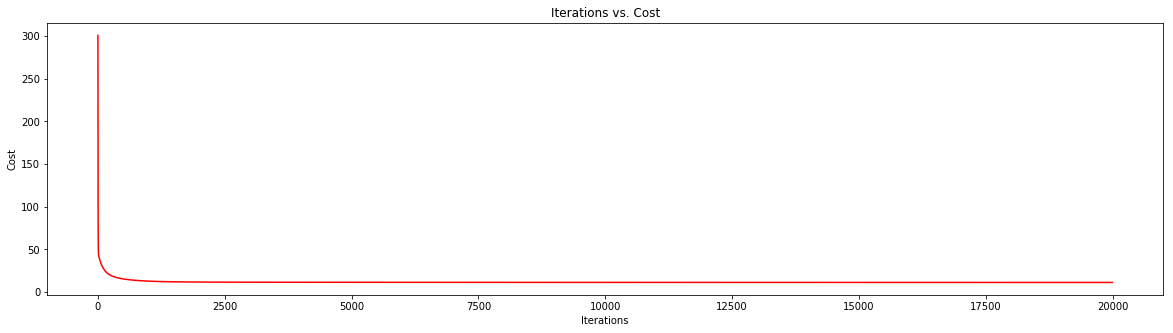

In [349]:
#plot the cost
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,5))
plt.plot(np.arange(len(c_gd)), c_gd, 'r')  
plt.xlabel('Iterations')  
plt.ylabel('Cost')  
plt.title('Iterations vs. Cost')  

In [350]:
# getting line with our optimal w and b
y = X_test @ w_gd + b_gd

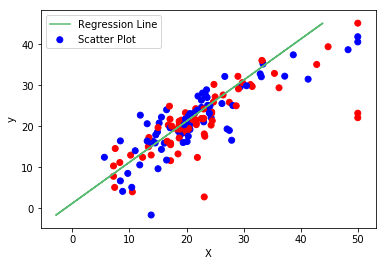

In [351]:
# Ploting Line
plt.plot((X_test @ w_gd), y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(y_test,y, label='Scatter Plot', color=['b', 'r'])
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [352]:
w_gd

array([-0.95020669,  1.08153916, -0.23482306,  0.69788326, -0.10031269,
        4.22972793, -0.52233573, -2.04937113,  0.63527521, -1.08330654,
       -1.09263846,  1.0485704 , -2.60680934])

In [347]:
b_gd

3.6595369287156556

### Stochastic Gradient Descent


In [ ]:
As Normal Gradient Descent is time consuming. we can go for Stochastic Gradient Descent technique which update the 
value of w and b after randomly selecting one training point in each iteration.

In [427]:
# initialize b and w
initial_b = 0
initial_w = np.zeros(13)

In [422]:
def stochasticGradientDescent(X,y,w_current,b_current,iters,learningRate):
        
    '''stochastic gradient descent  algorithm to be used to find minimal value of 
       the function named computeCost'''
    global cost_hist
    cost_hist = np.zeros(iters)
    cost_coef_val = []
    N = (len(X))
    for i in range(iters):
        cost = 0.0
        for j in range(N):            
            index = np.random.randint(0,N)
            y_current = X[index, :] @ w_current + b_current
            w_gradient = -(1/N) * X[index, :] * (y.values.reshape(-1, 1)[index, :] - y_current)
            b_gradient = -(1/N) * np.sum(y.values.reshape(-1, 1)[index, :] - y_current)
            cost += computeCost(b_current,w_current,X[index, :],y.values.reshape(-1, 1)[index, :])
            w_current = w_current - (learningRate * w_gradient)
            b_current = b_current - (learningRate * b_gradient)
        cost_hist[i] = computeCost(b_current,w_current,X[index, :],y.values.reshape(-1, 1)[index, :])
    return cost, w_current,b_current

c_sgd,w_sgd,b_sgd = stochasticGradientDescent(X_train,y_train,initial_w,initial_b,20000,.001)

Text(0.5,1,'Iterations vs. Cost')

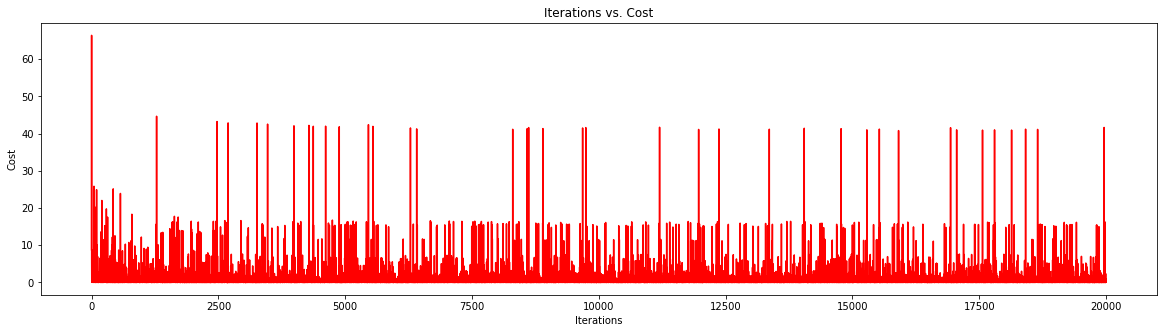

In [423]:
#plot the cost
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,5))
plt.plot(np.arange(len(cost_hist)), cost_hist, 'r')  
plt.xlabel('Iterations')  
plt.ylabel('Cost')  
plt.title('Iterations vs. Cost')  

In [424]:
y = X_test @ w_sgd.T + b_sgd

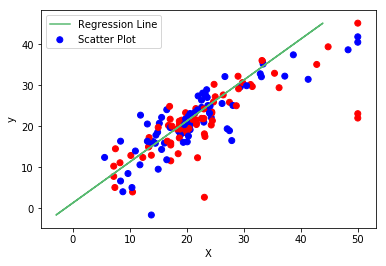

In [425]:
# Ploting Line
plt.plot((X_test @ w_sgd.T), y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(y_test,y, label='Scatter Plot', color=['b', 'r'])
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [426]:
w_sgd

array([-0.95434423,  1.08392984, -0.24195509,  0.69196879, -0.10573198,
        4.23222021, -0.52459365, -2.04615808,  0.6176153 , -1.09578871,
       -1.09453445,  1.05465589, -2.58977377])

### sklearn implementation 

In [98]:
# loading SGD from sklearn library
from sklearn.linear_model import SGDRegressor

In [178]:
# penalty = None ==> we are not using regularization term 
# alpha = 0 ==> we are not using regularization term 
# eta0 = 0.001 ==> learning rate
# max_iter = 1000 ==> we are iterating 1000 times
clf = SGDRegressor(penalty=None, alpha = 0, eta0 = 0.001,  max_iter = 60000,  fit_intercept=False)

In [179]:
clf.fit(X_train,y_train)
y_predicted = clf.predict(X_test)

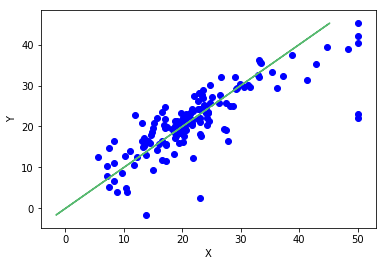

In [180]:
plt.plot(np.dot(X_test,clf.coef_), y_predicted, label='Regression Line', color='#58b970')
plt.scatter(y_test,y_predicted, label='Scatter Plot',color=['b'])
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

In [181]:
clf.coef_

array([-0.97319564,  1.13332097, -0.14539445,  0.68521139, -0.03785049,
        4.28971724, -0.53008002, -2.0246003 ,  0.85443077, -1.37542193,
       -1.03272274,  1.07984182, -2.56238278])

In [313]:
def minibatchGradientDescent(X,y,w_current,b_current,iters,learningRate,batch_size=20):
    '''
    minibatch gradient descent  algorithm to be used to find minimal value of 
       the function named computeCost''
    '''
    N = len(y)
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        cost =0.0
        indices = np.random.permutation(N)
        X = X[indices]
        y = y[indices]
        for j in range(0,N,batch_size):
            y_current = X[j:j+batch_size] @ w_current + b_current            
            w_gradient = -(1/N) * np.dot(X[j:j+batch_size].T , (y[j:j+batch_size] - y_current))
            b_gradient = -(1/N) * np.sum(y[j:j+batch_size] - y_current)
            cost += computeCost(b_current,w_current,X[j:j+batch_size],y[j:j+batch_size])
            w_current = w_current - (learningRate * w_gradient)
            b_current = b_current - (learningRate * b_gradient)
        cost_history[i]  = cost
        
    return w_current, cost_history

w_mgd,c_mgd = minibatch_gradient_descent(X_train,y_train,initial_w,initial_b,)
c_sgd,w_sgd,b_sgd = stochasticGradientDescent(X_train,y_train,initial_w,initial_b,20000,.001)
X,y,w_current,b_current,iters,learningRate

In [314]:
w_mgd,c_mgd = minibatch_gradient_descent(X_train,y_train,initial_w,initial_b,)

C:\Users\ABHISEK\Anaconda3\lib\site-packages\pandas\core\series.py:696: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


In [315]:
y = X_test @ w_mgd.T

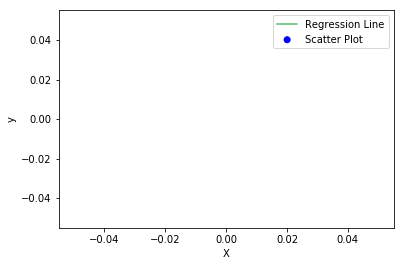

In [316]:
# Ploting Line
plt.plot((X_test @ w_mgd.T), y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(y_test,y, label='Scatter Plot', color=['b', 'r'])
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [438]:
def minibatchGradientDescent(X,y,w_current,b_current,iters,learningRate,batch_size=10):
    '''
    minibatch gradient descent  algorithm to be used to find minimal value of 
       the function named computeCost''
    '''
    N = len(X)
    global cost_hist
    cost_hist = np.zeros(iterations)
    
    for i in range(iterations):
        cost =0.0
        indices = np.random.permutation(N)
        X = X[indices]
        y = y[indices]
        for j in range(0,N,batch_size):
            y_current = X[j:j+batch_size] @ w_current + b_current            
            w_gradient = -(1/N) * np.dot(X[j:j+batch_size].T , (y[j:j+batch_size] - y_current))
            b_gradient = -(1/N) * np.sum(y[j:j+batch_size] - y_current)
            cost += computeCost(b_current,w_current,X[j:j+batch_size],y[j:j+batch_size])
            w_current = w_current - (learningRate * w_gradient)
            b_current = b_current - (learningRate * b_gradient)
        cost_hist[i]  = cost
        
    return cost, w_current,b_current

c_mgd,w_mgd,b_mgd = stochasticGradientDescent(X_train,y_train,initial_w,initial_b,20000,.001)

In [439]:
y = X_test @ w_mgd.T + b_mgd

Text(0.5,1,'Iterations vs. Cost')

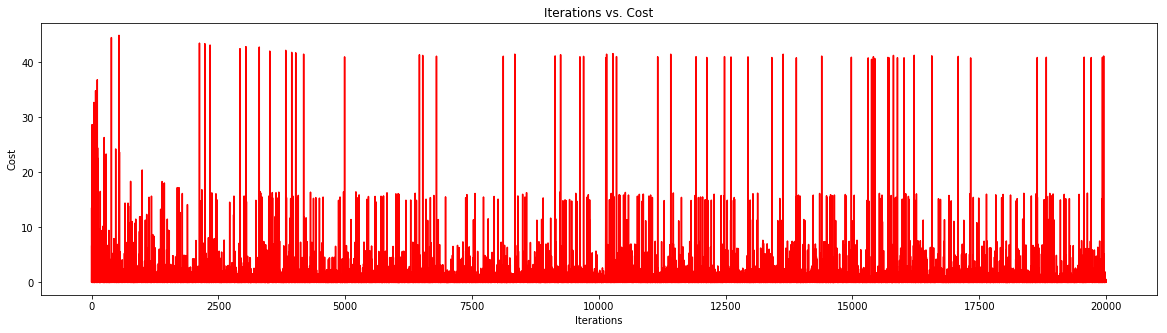

In [440]:
#plot the cost
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,5))
plt.plot(np.arange(len(cost_hist)), cost_hist, 'r')  
plt.xlabel('Iterations')  
plt.ylabel('Cost')  
plt.title('Iterations vs. Cost')  

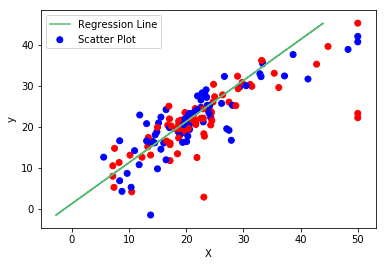

In [441]:
# Ploting Line
plt.plot((X_test @ w_mgd.T), y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(y_test,y, label='Scatter Plot', color=['b', 'r'])
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [442]:
w_mgd

array([-0.95141339,  1.07400338, -0.23421147,  0.68618898, -0.09252195,
        4.24014949, -0.52321885, -2.04389927,  0.62691813, -1.09457874,
       -1.08868475,  1.04738409, -2.59212814])

In [443]:
from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Algorithm", "Coefficients"]
x.add_row(["GD", w_gd])
x.add_row(["SGDRegressor",clf.coef_])
x.add_row(["SGD",w_sgd])
x.add_row(["MGD",w_mgd])
print("Comparison of Coefficients's of Algos:")
print(x)

Comparison of Coefficients's of Algos:
+--------------+--------------------------------------------------------------------------+
|  Algorithm   |                               Coefficients                               |
+--------------+--------------------------------------------------------------------------+
|      GD      | [-0.95020669  1.08153916 -0.23482306  0.69788326 -0.10031269  4.22972793 |
|              |  -0.52233573 -2.04937113  0.63527521 -1.08330654 -1.09263846  1.0485704  |
|              |                               -2.60680934]                               |
| SGDRegressor | [-0.97319564  1.13332097 -0.14539445  0.68521139 -0.03785049  4.28971724 |
|              |  -0.53008002 -2.0246003   0.85443077 -1.37542193 -1.03272274  1.07984182 |
|              |                               -2.56238278]                               |
|     SGD      | [-0.95434423  1.08392984 -0.24195509  0.69196879 -0.10573198  4.23222021 |
|              |  -0.52459365 -2.04615808